# Project 2: Spotify Popularity vs Album of the Year (AOTY) Ratings for The Beatles

**Datasets:**  
<u>The Beatles songs dataset</u>  
https://www.kaggle.com/datasets/devedzic/the-beatles-songs-dataset 

<u>Aggregated Music Albums Review  </u>  
https://www.kaggle.com/datasets/kauvinlucas/30000-albums-aggregated-review-ratings

In this project, I explore whether critically acclaimed Beatles albums also tend to be popular on modern streaming platforms like Spotify. I use two unfamiliar datasets — a Spotify dataset containing Beatles track features, and an Album of the Year (AOTY) ratings database which aggregates critic and user scores. 

**The goal:**   
Is the average Spotify popularity of an album correlated with its AOTY user engagement or critic score?

# <u>1. Importing and Merging the Data</u>

### 1.1. Import Pandas and Load Dataset 1: Spotify Beatles Songs

To begin the analysis, I start by importing pandas and loading the Spotify dataset.  
This dataset contains track-level information such as song name, album title, and Spotify popularity.  
Since my research question relies on average album popularity, I will later aggregate this dataset by album.


In [391]:
# Import pandas, load the dataset, and preview
import pandas as pd

spotify = pd.read_csv("The Beatles songs dataset 285x45 v0.csv")
spotify.head(10)


,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
0,spotify:track:2FDEHIMkjxFLzj688M2I3h,(You're So Square) Baby I Don't Care - Studio Jam,NaN,The Beatles,29.0,43.0,9.0,1.0,112.173,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spotify:track:2HvTGx5fzFGpHSyRNvXd9T,12-bar Original,1965,Anthology 2,31.0,175.0,9.0,1.0,122.678,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spotify:track:34dsKRJHIadrrNdCDtMwGn,A Beginning - Anthology 3 Version,NaN,Anthology 3,29.0,50.0,0.0,1.0,90.588,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,65.0,335.0,4.0,0.0,163.219,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,18.0,1.0,1.0
4,spotify:track:5J2CHimS7dWYMImCHkEFaJ,A Hard Day's Night,1964,A Hard Day's Night,71.0,152.0,0.0,1.0,138.514,4.0,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0
5,spotify:track:5RuE7nwp4TWsRvLXG7Yjy1,A Shot of Rhythm and Blues,1963,Live at the BBC,35.0,136.0,2.0,1.0,128.919,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,spotify:track:7fh53ta3vAOGJMQ4i5tCHe,A Taste of Honey,1963,Please Please Me,51.0,163.0,1.0,0.0,101.408,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,spotify:track:4dkoqJrP0L8FXftrMZongF,Across the Universe,1968,Let It Be,69.0,230.0,1.0,1.0,152.126,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,32.0,NaN
8,spotify:track:00fyPXxe2SCBHnFwEO9Eh1,Across the Universe - Take 2 / Anthology 2 Ver...,NaN,Anthology 2,35.0,212.0,2.0,1.0,79.377,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,spotify:track:0IxxqsYBcCHEQ1HqLYJnwx,Act Naturally,1965,Help!,52.0,139.0,7.0,1.0,93.020,4.0,...,NaN,47.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2. Grouping Songs Into Their Albums

The Spotify dataset is at the *song level*, meaning each row represents a single track.  
To compare albums, I need to convert this into *album-level* data.

In this step, I group all songs by album and compute the **average Spotify popularity** for each album.  
This gives a single popularity score per album, which I will later merge with AOTY ratings.

In [392]:
# group all songs by album and compute the average popularity
album_popularity = (
    spotify.groupby("Album", as_index=False)["Popularity"]
           .mean()
           .rename(columns={"Popularity": "Avg_Popularity"})
)

album_popularity


,Album,Avg_Popularity
0,A Hard Day's Night,58.307692
1,Abbey Road,63.529412
2,Abbey Road (Super Deluxe Edition),45.000000
3,Anthology 1,34.190476
4,Anthology 2,36.800000
5,Anthology 3,30.600000
6,Beatles for Sale,51.785714
7,Help!,60.071429
8,Let It Be,60.083333
9,Live At The BBC,29.333333


### 1.3. Checking Unique Album Names in the Spotify Dataset

Before merging with the AOTY dataset, I need to check how many distinct album names
appear in the Spotify dataset. Since the Spotify data is track-level, different versions
of the same album (such as remasters, deluxe editions, or live versions) may appear 
as separate album names.

If the same album appears under multiple slightly different names, the average popularity 
will be split across these variations, which would distort the analysis. Therefore, this
step identifies all unique album names and checks how many songs each album contains.


In [393]:
# list all unique album names
spotify["Album"].unique()



array(['The Beatles', 'Anthology 2', 'Anthology 3',
       "Sgt. Pepper's Lonely Hearts Club Band", "A Hard Day's Night",
       'Live at the BBC', 'Please Please Me', 'Let It Be', 'Help!',
       'Anthology 1', 'With the Beatles', 'Yellow Submarine',
       'Magical Mystery Tour', 'Revolver', 'Beatles for Sale',
       'Past Masters (Vols. 1 & 2 / Remastered)',
       'On Air – Live at the BBC Volume 2', 'Abbey Road', 'Rubber Soul',
       'Abbey Road (Super Deluxe Edition)', 'Live At The BBC',
       'On Air - Live At The BBC (Vol.2)', "Rock 'n' Roll Music", nan],
      dtype=object)

### 1.4. Import Dataset 2: AOTY Album Ratings

Now that I have processed album-level popularity from the Spotify dataset, I load 
the second dataset used in this project: the Album of the Year (AOTY) dataset.

This dataset contains album-level critic scores, user scores, and the number of 
AOTY user reviews. Since my analysis focuses on The Beatles, I will later filter 
this dataset to include only Beatles albums before merging it with the Spotify dataset.


In [394]:
# load AOTY dataset
aoty = pd.read_csv("album_ratings.csv")

# preview
aoty.head()


,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


### 1.5. Filtering the AOTY Dataset to The Beatles

The AOTY dataset contains ratings for thousands of albums from many different artists.  
Since this project focuses specifically on The Beatles, the next step is to filter the 
dataset so that only Beatles albums remain.

This will allow me to merge the AOTY data with the album-level Spotify popularity 
calculated earlier.


In [395]:
# filter AOTY dataset to only include The Beatles
aoty_beatles = aoty[aoty["Artist"] == "The Beatles"].copy()

# preview Beatles-only AOTY ratings
aoty_beatles


,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
2891,The Beatles,Abbey Road,September,26,1969,LP,Apple,Pop Rock,NaN,NaN,NaN,NaN,100,5,91,1724
2892,The Beatles,Revolver,August,5,1966,LP,Parlophone / Capitol,Pop Rock,NaN,NaN,NaN,NaN,100,7,90,1566
2893,The Beatles,Rubber Soul,December,3,1965,LP,Parlophone / Capitol,Pop Rock,NaN,NaN,NaN,NaN,100,6,86,1149
2894,The Beatles,Help!,August,6,1965,LP,Parlophone,Pop Rock,NaN,NaN,NaN,NaN,98,4,80,677
2895,The Beatles,Beatles for Sale,December,4,1964,LP,Parlophone,Pop Rock,NaN,NaN,NaN,NaN,91,4,73,550
2896,The Beatles,A Hard Day's Night,July,10,1964,LP,Parlophone,Pop Rock,NaN,NaN,NaN,NaN,98,6,79,654
2897,The Beatles,With The Beatles,November,22,1963,LP,Parlophone,Pop Rock,NaN,NaN,NaN,NaN,94,4,73,586
2898,The Beatles,Please Please Me,March,22,1963,LP,Parlophone,Pop Rock,NaN,NaN,NaN,NaN,94,5,76,692
2899,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,June,1,1967,LP,Parlophone / Capitol,Pop Rock,NaN,NaN,NaN,NaN,98,6,90,1576
2900,The Beatles,The Beatles,November,22,1968,LP,Apple,Pop Rock,NaN,NaN,NaN,NaN,97,7,89,1188


### 1.6. Merging the Two Datasets

I create a simple album key and merge the Spotify and AOTY datasets using an inner join so only albums that appear in both datasets are kept. I also exclude reissue versions because they refer to the same album as the original, and keeping duplicates would distort the results.

In [396]:
# create simple album keys
album_popularity["Album_key"] = album_popularity["Album"].str.lower().str.strip()
aoty_beatles["Album_key"] = aoty_beatles["Title"].str.lower().str.strip()

# merge the two datasets, keeping only albums that appear in both
merged = pd.merge(
    album_popularity,
    aoty_beatles,
    on="Album_key",
    how="inner",
    suffixes=("_Spotify", "_AOTY")
)

# drop the AOTY 'Title' (This column also refer to album)
merged = merged.drop(columns=["Title"])

# preview merged data
merged[[
    "Album",
    "Avg_Popularity",
    "AOTY Critic Score",
    "AOTY User Score",
    "AOTY User Reviews"
]]


,Album,Avg_Popularity,AOTY Critic Score,AOTY User Score,AOTY User Reviews
0,A Hard Day's Night,58.307692,98,79,654
1,Abbey Road,63.529412,100,91,1724
2,Beatles for Sale,51.785714,91,73,550
3,Help!,60.071429,98,80,677
4,Let It Be,60.083333,80,79,723
5,Magical Mystery Tour,60.727273,91,86,838
6,Please Please Me,59.000000,94,76,692
7,Revolver,60.357143,100,90,1566
8,Rubber Soul,62.357143,100,86,1149
9,Sgt. Pepper's Lonely Hearts Club Band,59.692308,98,90,1576


# <u>2. Visualize The Data</u>

### 2.1. Import Matplotlib for Visualization

Before creating the scatter plots, I import Matplotlib (for plotting) and NumPy (for calculating trendlines). These libraries will be used to visualize the relationship between Spotify popularity and AOTY ratings.

In [397]:
import matplotlib.pyplot as plt
import numpy as np


### 2.2. Visualizing Spotify Popularity vs AOTY User Reviews

This chart shows whether Beatles albums that are more popular on Spotify also receive 
more user reviews on Album of the Year. Each point represents one album.


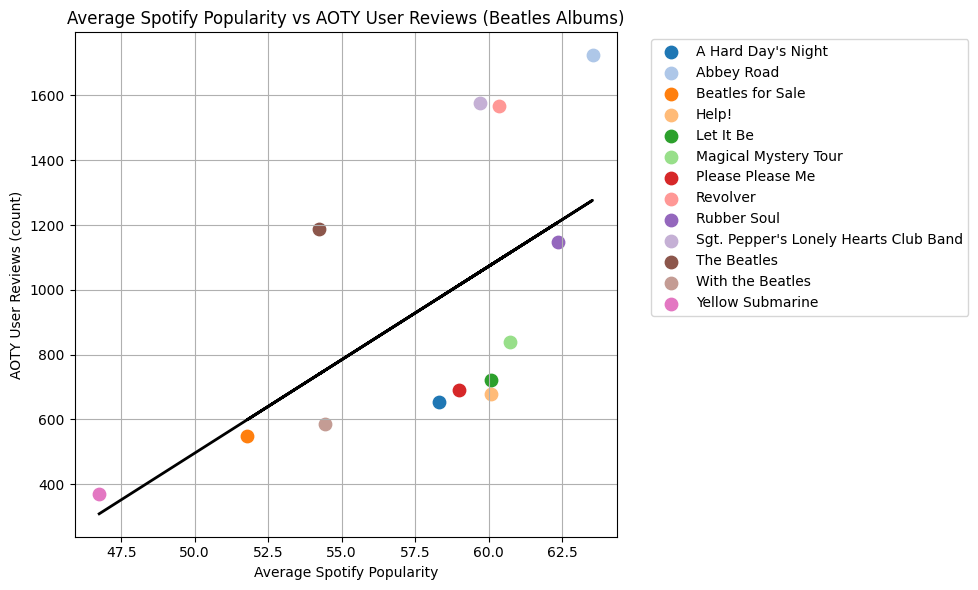

In [398]:
plt.figure(figsize=(10,6))

# apply unique colors
colors = plt.cm.tab20(range(len(merged)))

# scatter each album separately
for i, row in merged.iterrows():
    plt.scatter(
        row["Avg_Popularity"],
        row["AOTY User Reviews"],
        color=colors[i],
        s=80,
        label=row["Album"]
    )

# trendline
x = merged["Avg_Popularity"]
y = merged["AOTY User Reviews"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black", linewidth=2)

plt.title("Average Spotify Popularity vs AOTY User Reviews (Beatles Albums)")
plt.xlabel("Average Spotify Popularity")
plt.ylabel("AOTY User Reviews (count)")
plt.grid(True)

# put legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 2.3. Visualizing Spotify Popularity vs AOTY Critic Score

Next, I create a scatter plot comparing the average Spotify popularity of each Beatles
album with the AOTY Critic Score. This helps show whether albums that stream well today
also tend to be rated more highly by music critics.

I use different colors for each album and include a trendline to highlight the overall pattern.


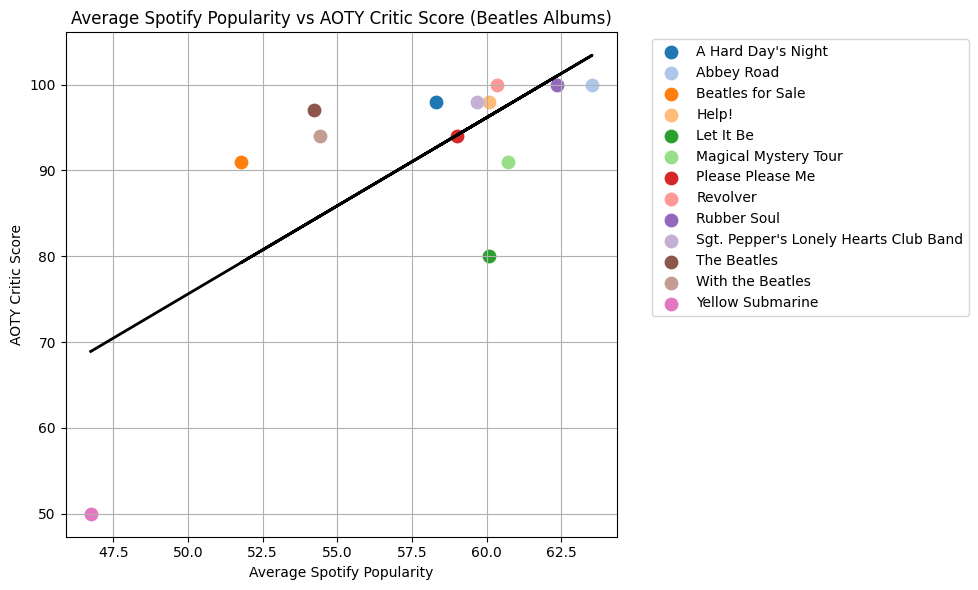

In [399]:
plt.figure(figsize=(10,6))

# unique colors
colors = plt.cm.tab20(range(len(merged)))

# scatter each album separately
for i, row in merged.iterrows():
    plt.scatter(
        row["Avg_Popularity"],
        row["AOTY Critic Score"],
        color=colors[i],
        s=80,
        label=row["Album"]
    )

# trendline
x = merged["Avg_Popularity"]
y = merged["AOTY Critic Score"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black", linewidth=2)

plt.title("Average Spotify Popularity vs AOTY Critic Score (Beatles Albums)")
plt.xlabel("Average Spotify Popularity")
plt.ylabel("AOTY Critic Score")
plt.grid(True)

# put legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Furthermore, to quantify the strength of the relationships observed in the visualizations, I calculate
the correlation coefficients (Pearson's r). This value ranges from -1 to 1:

- 1   = perfect positive correlation  
- 0   = no correlation  
- -1  = perfect negative correlation

This helps support (or challenge) what we see in the scatter plots.


In [400]:
# correlation between Spotify popularity and AOTY user reviews
corr_user = merged["Avg_Popularity"].corr(merged["AOTY User Reviews"])

# correlation between Spotify popularity and AOTY critic score
corr_critic = merged["Avg_Popularity"].corr(merged["AOTY Critic Score"])

corr_user, corr_critic

(np.float64(0.6092498605234636), np.float64(0.7093055952919171))

The correlations (around 0.61 for user reviews and 0.71 for critic scores) indicate a moderate to strong positive relationship. This means that albums which are streamed more on Spotify also tend to receive more reviews and higher critic scores on AOTY.

# <u>3. Key Takeaways</u>

**1. Spotify popularity and AOTY user reviews rise together.**  
More popular albums on Spotify tend to receive more user reviews on AOTY.

**2. Popular albums also score higher with critics.**   
There is a clear positive relationship between Spotify popularity and AOTY critic scores.

**3. The Beatles’ classic albums lead in all metrics.**  
Albums like Abbey Road, Revolver, and Sgt. Pepper are the most streamed, most reviewed, and most critically acclaimed.

**4. A few albums are outliers, but in expected ways.**   
Yellow Submarine scores low across the board, while Let It Be is popular but has lower critic scores.

**5. Overall: Modern listeners and critics largely agree.**  
Albums that critics loved decades ago are still the ones people stream the most today.